<a href="https://colab.research.google.com/github/sidharth-ds/Startups-Profit-Prediction-project/blob/main/Profit_Prediction_for_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression is commonly used in Forecasting, Predicting and Financial analysis
* example: for a company to tell how a changes in GDP could affect sales.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


* Administration is Administration cost

In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Encoding:

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
data['State']=lr.fit_transform(data['State'])
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


### looking at the linear correlation between the features:

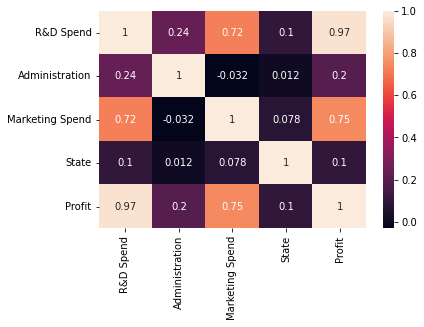

In [ ]:
sns.heatmap(data.corr(), annot=True)   # checking Linear Relationship
plt.show()

There are linear relationships between:
  * R&D spending and Profit
  * Market spending and Profit

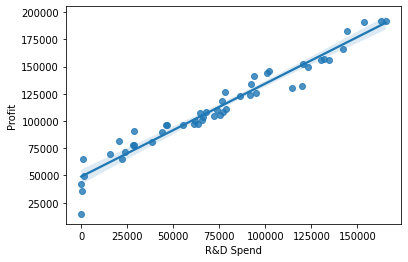

In [ ]:
sns.regplot(x="R&D Spend", y="Profit", data=data)

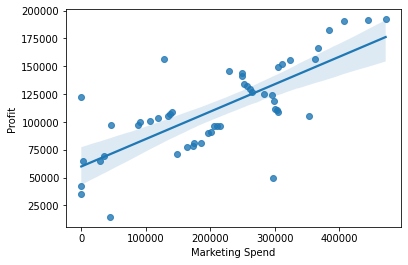

In [ ]:
sns.regplot(x="Marketing Spend", y="Profit", data=data)

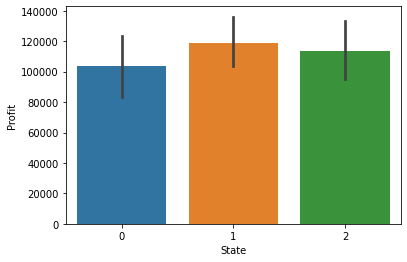

In [ ]:
sns.barplot(x="State", y="Profit", data=data)

### data Preparation:

In [ ]:
x = data[["R&D Spend", "Administration", "Marketing Spend", "State"]].values
y = data["Profit"].values

# x = x.to_numpy()
# y = y.to_numpy()
# y = y.reshape(-1, 1)  # reshaping to matrix format

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Modelling:

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# fitting
model.fit(xtrain, ytrain)

# predicting
ypred = model.predict(xtest)

In [ ]:
ytest.shape,ypred.shape

((10,), (10,))

In [ ]:
df = pd.DataFrame({'Actual value':ytest , 'Predicted value': ypred})
df

,Actual value,Predicted value
0,134307.35,126720.661507
1,81005.76,84909.089619
2,99937.59,98890.318549
3,64926.08,46479.312402
4,125370.37,129113.183188
5,35673.41,50968.883978
6,105733.54,109015.016268
7,107404.34,100893.570781
8,97427.84,97713.738214
9,122776.86,113085.590561


### Evaluation metric:

In [ ]:
from sklearn import metrics 

print('R2- SCORE:', metrics.r2_score(ytest,ypred))

R2- SCORE: 0.9000614254946404


result : R2 of 0.9 shows that the model is a very good model

### XGBoost - 2nd model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import xgboost as xgb            
from sklearn.model_selection import cross_val_score

for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # learing rate = lambda   # verbosity=0 means dont show warnings
                                                                                
  model.fit(xtrain,ytrain) #train the model
  model.score(xtest, ytest) # scoring the model - r2 squared
  
  print("Learning rate : ", lr, " Train score : ", model.score(xtrain,ytrain), " Cross-Val score : ", np.mean(cross_val_score(model, xtrain, ytrain, cv=10)))

Learning rate :  0.01  Train score :  -0.428134739056677  Cross-Val score :  -1.0559415376892054
Learning rate :  0.02  Train score :  0.7475036470653298  Cross-Val score :  0.5678089660359876
Learning rate :  0.03  Train score :  0.9487877959117864  Cross-Val score :  0.8408039327136534
Learning rate :  0.04  Train score :  0.9856731241395331  Cross-Val score :  0.8883042603938638
Learning rate :  0.05  Train score :  0.9940484379032912  Cross-Val score :  0.8947848472073872
Learning rate :  0.1  Train score :  0.9991088232563696  Cross-Val score :  0.8982557475686489
Learning rate :  0.11  Train score :  0.9994643363897358  Cross-Val score :  0.897881000156981
Learning rate :  0.12  Train score :  0.9996341411096518  Cross-Val score :  0.8977511884050987
Learning rate :  0.13  Train score :  0.9996644121397302  Cross-Val score :  0.8967108567938318
Learning rate :  0.14  Train score :  0.9997686873390081  Cross-Val score :  0.8977222886608776
Learning rate :  0.15  Train score :  0.9

* Result: At Learning rate = 0.2, Cross_Validation score is 0.90

Hence results of both Linear Regression and XGBoost shows that both models perform equally good in predicting the profits.